## Homework Submission

**Name:** Atul Parida  
**Student ID:** 1006184  
**Course:** 50.007 Machine Learning, Summer 2023  
**Submission:** Homework 1 - Question 3

In [75]:
# imports required for ML model
import numpy as np
import matplotlib.pyplot as plt

In [76]:
# Data loading, preprocessing, splitting

X = np.genfromtxt('hw1_ridge_x.dat', delimiter = ',')
Y = np.genfromtxt('hw1_ridge_y.dat')

# Splitting data into training and validation sets
# 40 entries training, 10 entries validation
train_X = X[:40]
train_Y = Y[:40]
valid_X = X[40:]
valid_Y = Y[40:]

In [77]:
def ridge_regression(x, y, l):
    w = np.matmul(np.linalg.inv((len(x) * l * np.eye(x.shape[1]) + np.matmul(x.T, x))), np.matmul(x.T, y))
    return w

# Calculate the exact solution for ridge regression
lambda_val = 0.15
weights = ridge_regression(train_X, train_Y, lambda_val)
print("Weights for lambda =", lambda_val, ":", weights)


Weights for lambda = 0.15 : [-5.55705218e-01  1.15682144e+00 -1.59042086e-03 -1.60716070e+00]


In [78]:
# Perform ridge regression for different lambda values and plot the losses
tn = train_X.shape[0]
vn = valid_X.shape[0]
tloss = []
vloss = []
index = np.arange(-5, 0, 0.1)

for i in index:
    w = ridge_regression(train_X, train_Y, 10 ** i)
    tloss.append(np.sum((np.dot(train_X, w) - train_Y) ** 2) / tn / 2)
    vloss.append(np.sum((np.dot(valid_X, w) - valid_Y) ** 2) / vn / 2)


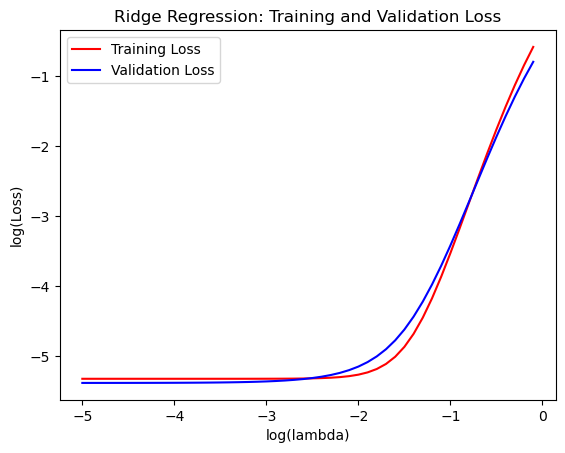

In [79]:
# Plot data

plt.plot(index, np.log(tloss), 'r', label='Training Loss')
plt.plot(index, np.log(vloss), 'b', label='Validation Loss')
plt.xlabel('log(lambda)')
plt.ylabel('log(Loss)')
plt.title('Ridge Regression: Training and Validation Loss')
plt.legend()
plt.show()

In [80]:
# Find the lambda value that minimizes the validation loss
best_lambda_index = np.argmin(vloss)
best_lambda = 10 ** index[best_lambda_index]
print("Lambda value that minimizes validation loss:", best_lambda)

# Calculate the weights for the best lambda value
best_weights = ridge_regression(train_X, train_Y, best_lambda)
print("Weights for lambda =", best_lambda, ":", best_weights)

Lambda value that minimizes validation loss: 1e-05
Weights for lambda = 1e-05 : [-0.57472691  1.35488292  0.00797262 -1.87369087]
